In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ENB2012_data.xlsx to ENB2012_data.xlsx


In [ ]:
EBS = pd.read_excel('ENB2012_data.xlsx')
EBS.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
#Rename columns
columns_name = {'X1':'Relative_Compactness', 'X2':'Surface_Area', 'X3':'Wall_Area', 'X4':'Roof_Area', 'X5':'Overall_Height',
                'X6':'Orientation', 'X7':'Glazing_Area', 'X8':'Glazing_Area_Distribution',
                'Y1':'Heating_Load', 'Y2':'Cooling_Load' }

In [ ]:
EBS = EBS.rename(columns = columns_name)
EBS.head(3)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


In [ ]:
#select a sample of the Dataset
simple_linear_reg_df = EBS[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state = 2)

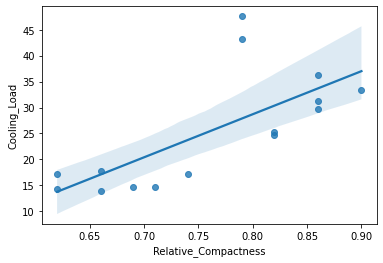

In [ ]:
#regression plot
sns.regplot(x = 'Relative_Compactness', y = 'Cooling_Load', data = simple_linear_reg_df)

#MEASURING REGRESSION PERFORMANCE

In [ ]:
#Normalise tha data to a common scale using min max scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
normalised_EBS = pd.DataFrame(scaler.fit_transform(EBS), columns = EBS.columns)

In [ ]:
feature_ebs = normalised_EBS.drop(columns = ['Heating_Load', 'Cooling_Load'])
target = normalised_EBS['Heating_Load']

In [ ]:
#Split dataset into Training and testing dataset
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_ebs, target, test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()

In [ ]:
#fit the model to the traning dataset
linear_model.fit(x_train, y_train)

LinearRegression()

#making prediction

In [ ]:
#obtain prediction
predicted_values = linear_model.predict(x_test)

#REGRESSION MODEL EVALUATION METRICS


#MAE {MEAN ABSOLUTE ERROR

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

#RESIDUAL SUM OF SQUARES(RSS

In [ ]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.823

#R-SQUARED

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

#R_SQUARED

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

In [ ]:
df = pd.DataFrame(data = {'actual values' : y_test,
                          'predictions' : predicted_values})
df

,actual values,predictions
285,0.181451,0.178589
101,0.638177,0.581421
581,0.823942,0.753662
352,0.877865,0.719482
726,0.774063,0.764160
...,...,...
241,0.493934,0.531616
599,0.927743,0.916504
650,0.218118,0.229004
11,0.331626,0.480835


#PENALIZATION METHOD

#Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

#Feature Selection and Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

#Comparing the Effects Of Regularization

In [ ]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  wts = pd.Series(model.coef_, feat.columns).sort_values()
  wts_df = pd.DataFrame(wts).reset_index()
  wts_df.columns = ['Features', col_name]
  wts_df[col_name].round(3)
  return wts_df

In [ ]:
Linear_model_wts = get_weights_df(linear_model, x_train, 'Linear_model_wts')
ridge_wts_df = get_weights_df(ridge_reg, x_train, 'Ridge_wts')
lasso_wts_df = get_weights_df(lasso_reg, x_train, 'Lass0_wts')

In [ ]:
final_wts = pd.merge(Linear_model_wts, ridge_wts_df, on = 'Features')
final_wts = pd.merge(final_wts, lasso_wts_df, on = 'Features')
final_wts

,Features,Linear_model_wts,Ridge_wts,Lass0_wts
0,Surface_Area,-6.387091e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-2.822876e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.029088,0.021431
4,Glazing_Area,2.295933e-01,0.212449,0.206132
5,Overall_Height,3.852539e-01,0.442467,0.463482
6,Wall_Area,3.725803e+12,0.103061,0.200087
7,Roof_Area,4.790318e+12,-0.163192,-0.000000
